# 🧭 1. Exploratory Analysis (EDA & Descriptive Statistics)
* What is the distribution of product prices across categories and brands?
* Which product categories contribute most to total revenue?

In [2]:
# Import Libraries ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv(r"D:\desktop - new\Data\electronics_dataset.csv")

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date
0,1,Monitor,1,150.89,2023-10-07
1,2,Keyboard,4,36.51,2023-01-03
2,3,Monitor,9,26.52,2023-08-31
3,4,Desk,1,15.66,2023-01-23
4,5,Keyboard,4,106.02,2023-05-26


In [5]:
df.shape

(100, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          100 non-null    int64  
 1   Product           100 non-null    object 
 2   Quantity Ordered  100 non-null    int64  
 3   Price Each        100 non-null    float64
 4   Order Date        100 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


In [11]:
# Basic Descriptive Stats by Category and Brand 
price_summary = df.groupby(['Product'])['Price Each'].describe().round(2)
print(price_summary.head(10))

                     count    mean    std    min     25%     50%     75%  \
Product                                                                    
Chair                  8.0  102.94  70.16  33.72   44.98   73.74  176.88   
Desk                  10.0  109.60  74.81  15.66   43.59  100.39  183.06   
External Hard Drive   10.0   95.06  53.85  21.58   44.66  106.08  119.92   
Headphones            10.0   72.68  49.59  19.53   43.96   60.67   76.69   
Keyboard              13.0   99.25  45.85  32.78   85.81   95.24  137.11   
Laptop                10.0   81.60  60.47  21.52   23.99   64.89  141.87   
Monitor               12.0  103.28  61.57  14.00   53.74  113.86  155.92   
Mouse                  5.0  114.88  63.68  10.62   96.87  151.55  154.88   
Printer                6.0  134.22  60.61  21.01  128.59  146.01  168.08   
Tablet                16.0  111.73  67.37  19.61   40.64  130.94  172.67   

                        max  
Product                      
Chair                195.82

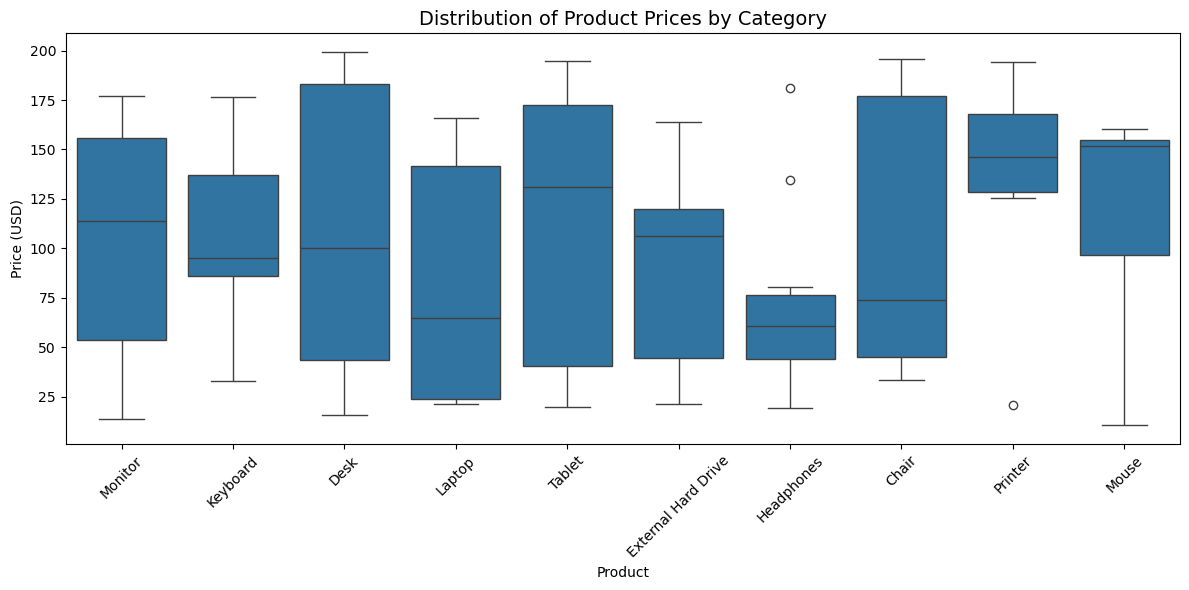

In [12]:
# Visualization: Boxplot of Prices by Category 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product', y='Price Each')
plt.title('Distribution of Product Prices by Category', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Price (USD)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

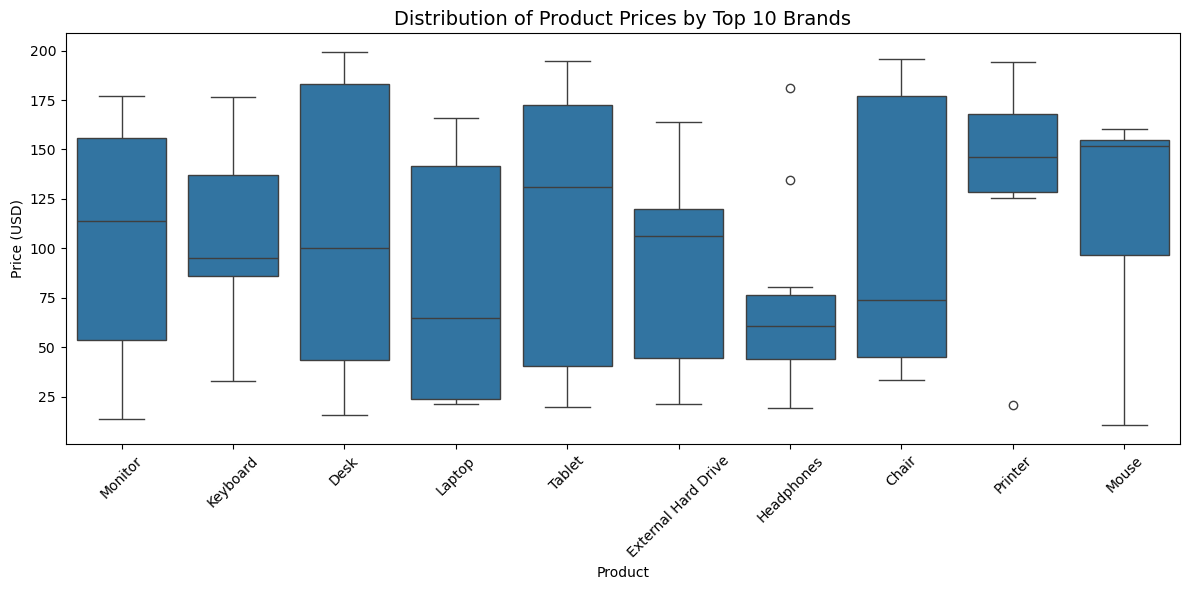

In [13]:
# Visualization: Boxplot of Prices by Brand (Top 10 Brands) 
top_brands = df['Product'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Product'].isin(top_brands)], x='Product', y='Price Each')
plt.title('Distribution of Product Prices by Top 10 Brands', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Price (USD)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

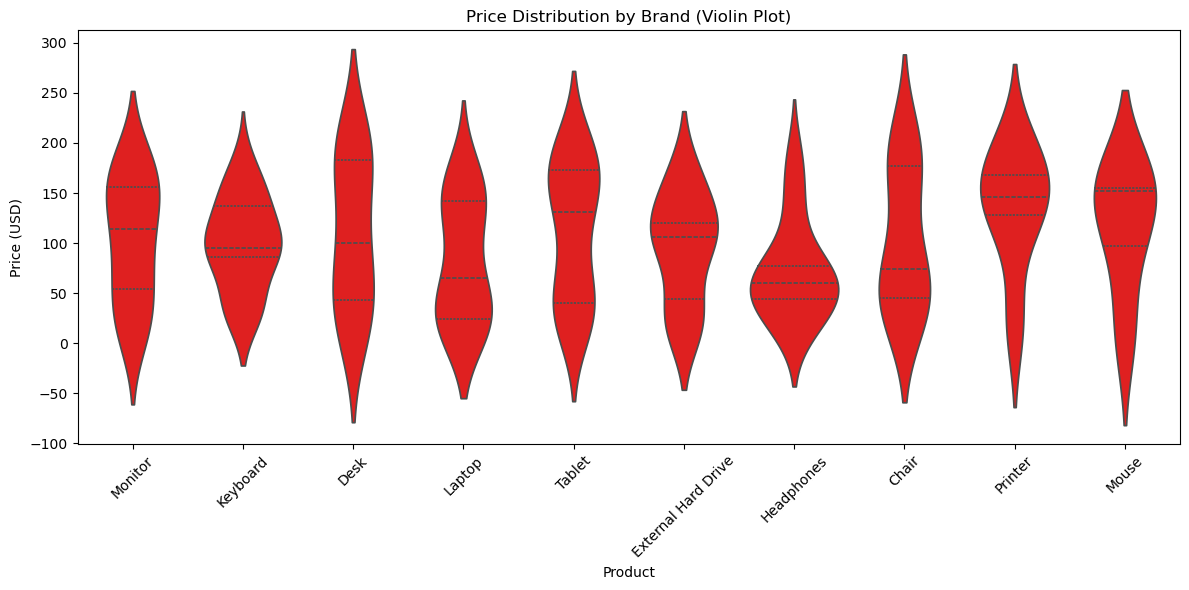

In [15]:
# Optional: Violinplot for richer price distribution 
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['Product'].isin(top_brands)], x='Product', y='Price Each', inner='quart', color = "r")
plt.title('Price Distribution by Brand (Violin Plot)')
plt.xticks(rotation=45)
plt.ylabel('Price (USD)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

In [18]:
price_group = df.groupby(['Product'])['Price Each'].mean()
price_group

Product
Chair                  102.940000
Desk                   109.602000
External Hard Drive     95.058000
Headphones              72.683000
Keyboard                99.245385
Laptop                  81.595000
Monitor                103.283333
Mouse                  114.884000
Printer                134.215000
Tablet                 111.729375
Name: Price Each, dtype: float64

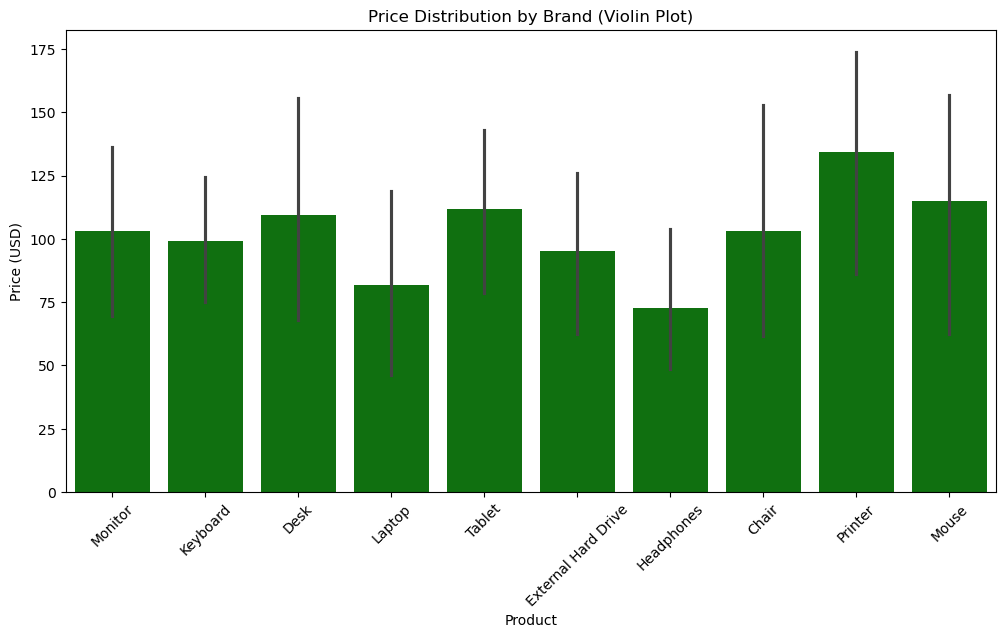

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data = df,  x='Product', y='Price Each', color = "green")
plt.title('Price Distribution by Brand (Violin Plot)')
plt.xticks(rotation=45)
plt.ylabel('Price (USD)')
plt.xlabel('Product')
plt.show()

In [23]:
# Which product categories contribute most to total revenue?
df['Revenue'] = df['Price Each'] * df['Quantity Ordered']

In [24]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Revenue
0,1,Monitor,1,150.89,2023-10-07,150.89
1,2,Keyboard,4,36.51,2023-01-03,146.04
2,3,Monitor,9,26.52,2023-08-31,238.68


In [26]:
category_revenue = (df.groupby('Product')['Revenue']
                    .sum()
                    .sort_values(ascending=False)
                    .reset_index())
category_revenue

,Product,Revenue
0,Tablet,8060.30
1,Keyboard,7721.42
2,Desk,7116.89
3,External Hard Drive,5836.90
4,Monitor,5484.28
5,Chair,4316.00
6,Printer,4278.49
7,Headphones,3413.01
8,Laptop,2867.39
9,Mouse,2586.29


=== Revenue Contribution by Category ===
               Product  Revenue  Revenue (%)
0               Tablet  8060.30    15.596263
1             Keyboard  7721.42    14.940548
2                 Desk  7116.89    13.770814
3  External Hard Drive  5836.90    11.294099
4              Monitor  5484.28    10.611798
5                Chair  4316.00     8.351236
6              Printer  4278.49     8.278657
7           Headphones  3413.01     6.603998
8               Laptop  2867.39     5.548251
9                Mouse  2586.29     5.004337


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10192\3675436183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='Revenue', y='Product', palette='viridis')


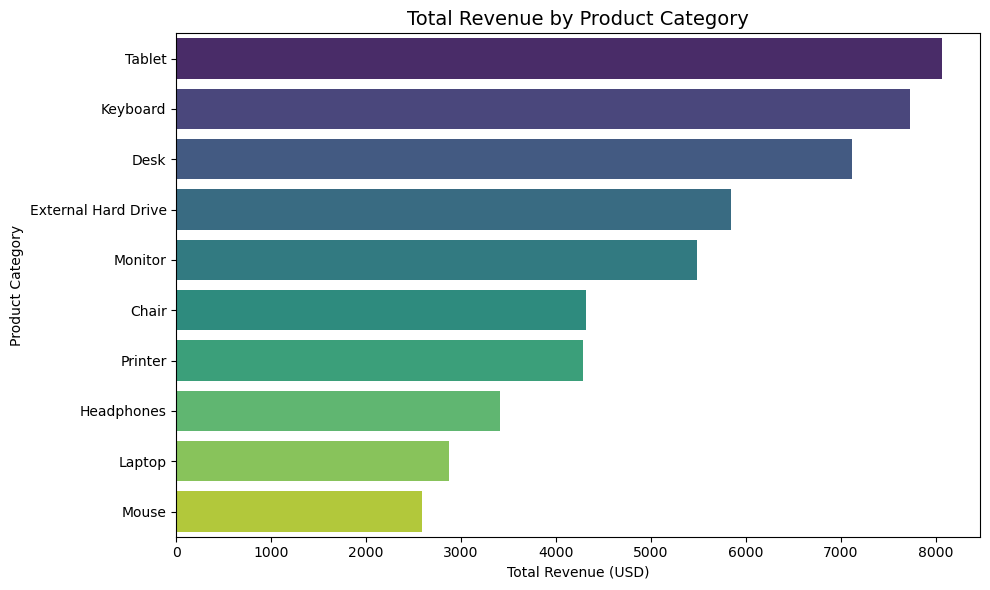

In [68]:
# Calculate contribution percentage 
category_revenue['Revenue (%)'] = 100 * category_revenue['Revenue'] / category_revenue['Revenue'].sum()

print("=== Revenue Contribution by Category ===")
print(category_revenue)

# Visualization: Bar Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x='Revenue', y='Product', palette='viridis')
plt.title('Total Revenue by Product Category', fontsize=14)
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig("avg_price_by_category.png", dpi=300, bbox_inches='tight')
plt.show()

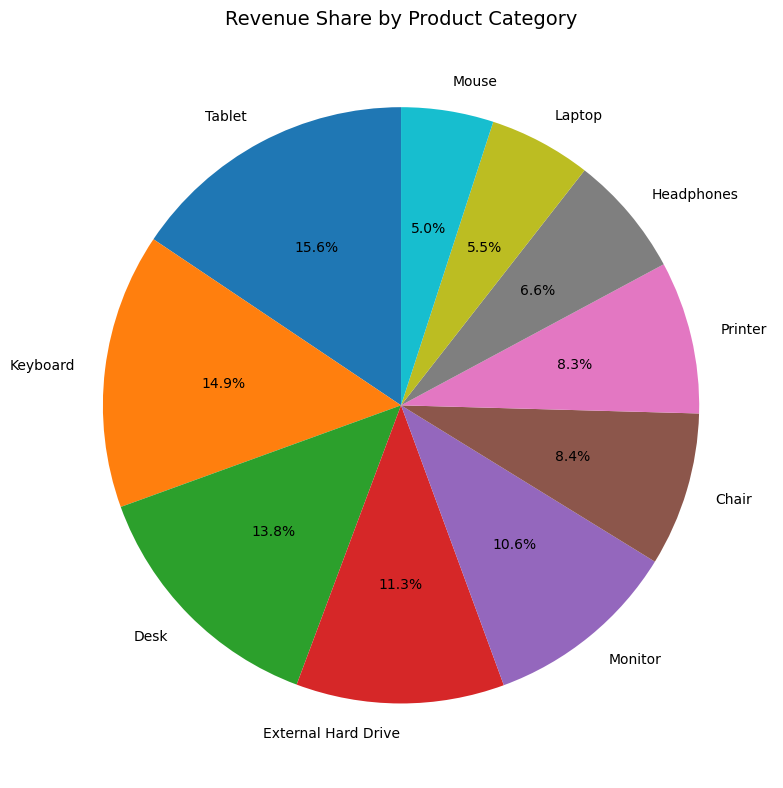

In [28]:
# Optional: Pie Chart for share visualization
plt.figure(figsize=(8, 8))
plt.pie(category_revenue['Revenue'], labels=category_revenue['Product'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab10'))
plt.title('Revenue Share by Product Category', fontsize=14)
plt.tight_layout()
plt.show()

# 📊 2. Time-Based Analysis (if dates exist)

* How have electronics sales evolved over time (monthly, quarterly, yearly)?

* Are there seasonal trends (e.g., holiday peaks, new product launches)?

* Which categories show the most consistent growth or volatility over time?

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          100 non-null    int64         
 1   Product           100 non-null    object        
 2   Quantity Ordered  100 non-null    int64         
 3   Price Each        100 non-null    float64       
 4   Order Date        100 non-null    datetime64[ns]
 5   Revenue           100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.8+ KB


In [32]:
# Add Time Features 
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)

In [33]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Revenue,Year,Month,Quarter
0,1,Monitor,1,150.89,2023-10-07,150.89,2023,2023-10,2023Q4
1,2,Keyboard,4,36.51,2023-01-03,146.04,2023,2023-01,2023Q1


In [34]:
# Aggregate Sales 
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()
quarterly_sales = df.groupby('Quarter')['Revenue'].sum().reset_index()
yearly_sales = df.groupby('Year')['Revenue'].sum().reset_index()

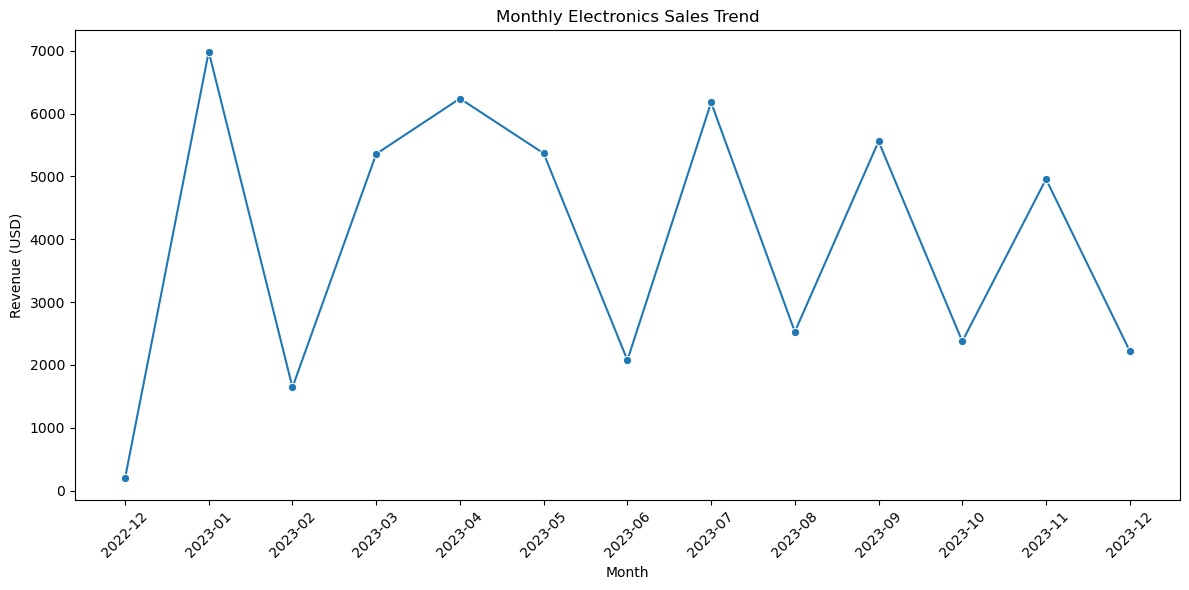

In [35]:
# Plot Monthly Sales 
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Electronics Sales Trend')
plt.ylabel('Revenue (USD)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10192\415848449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='Quarter', y='Revenue', palette='Blues_d')


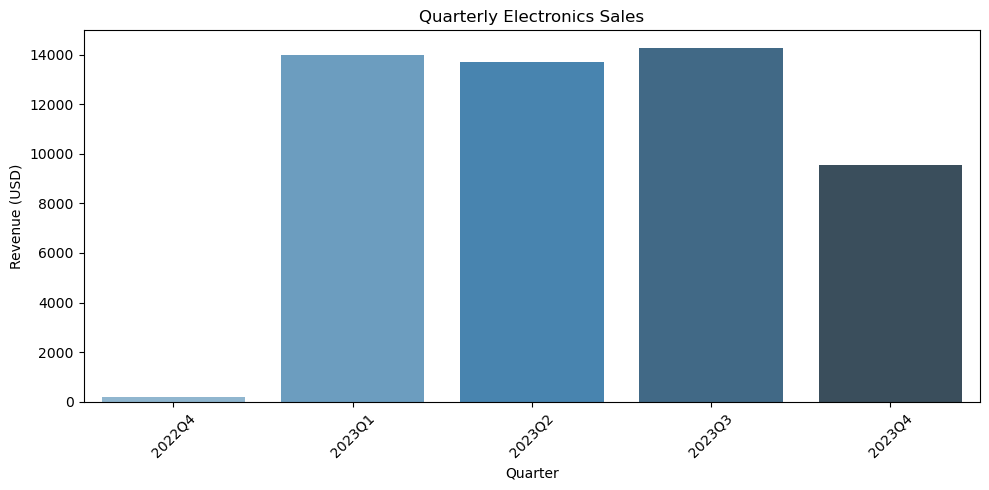

In [36]:
# Plot Quarterly Sales
plt.figure(figsize=(10,5))
sns.barplot(data=quarterly_sales, x='Quarter', y='Revenue', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Quarterly Electronics Sales')
plt.ylabel('Revenue (USD)')
plt.xlabel('Quarter')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10192\1956320624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='Year', y='Revenue', palette='viridis')


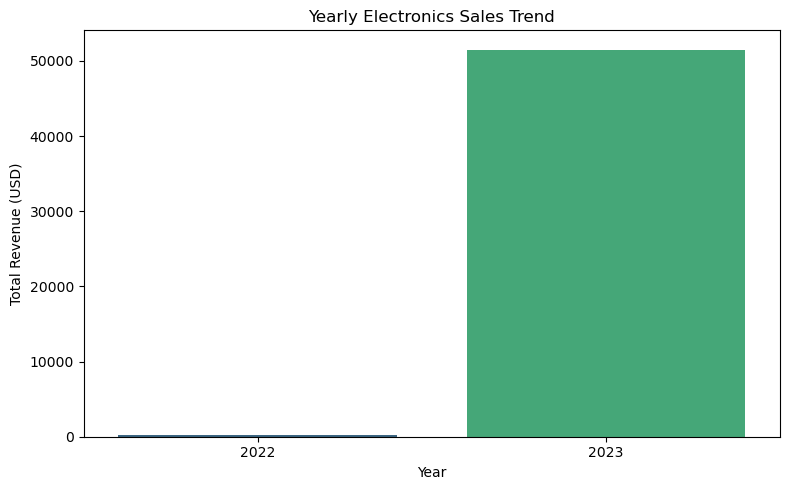

In [37]:
# Plot Yearly Sales 
plt.figure(figsize=(8,5))
sns.barplot(data=yearly_sales, x='Year', y='Revenue', palette='viridis')
plt.title('Yearly Electronics Sales Trend')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10192\1955799717.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = (df.groupby(pd.Grouper(key='Order Date', freq='M'))['Revenue']


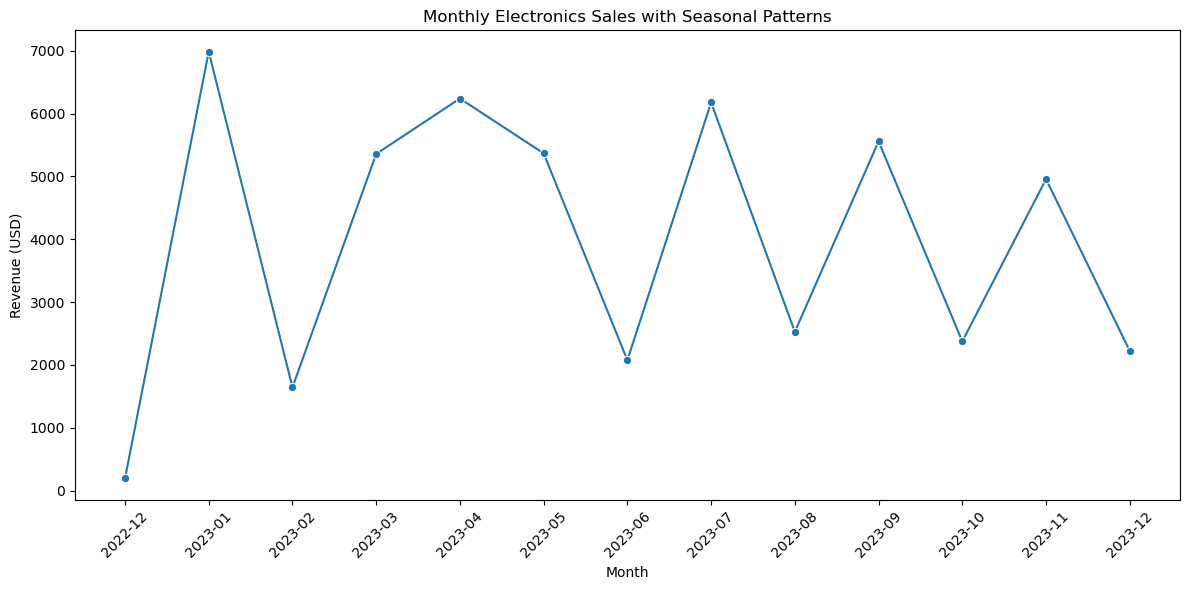

In [39]:
# Are there seasonal trends (e.g., holiday peaks, new product launches)?
# Aggregate Monthly Sales 
monthly_sales = (df.groupby(pd.Grouper(key='Order Date', freq='M'))['Revenue']
                   .sum()
                   .reset_index())

monthly_sales['Month'] = monthly_sales['Order Date'].dt.strftime('%Y-%m')

# Plot Time Series 
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Electronics Sales with Seasonal Patterns')
plt.ylabel('Revenue (USD)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

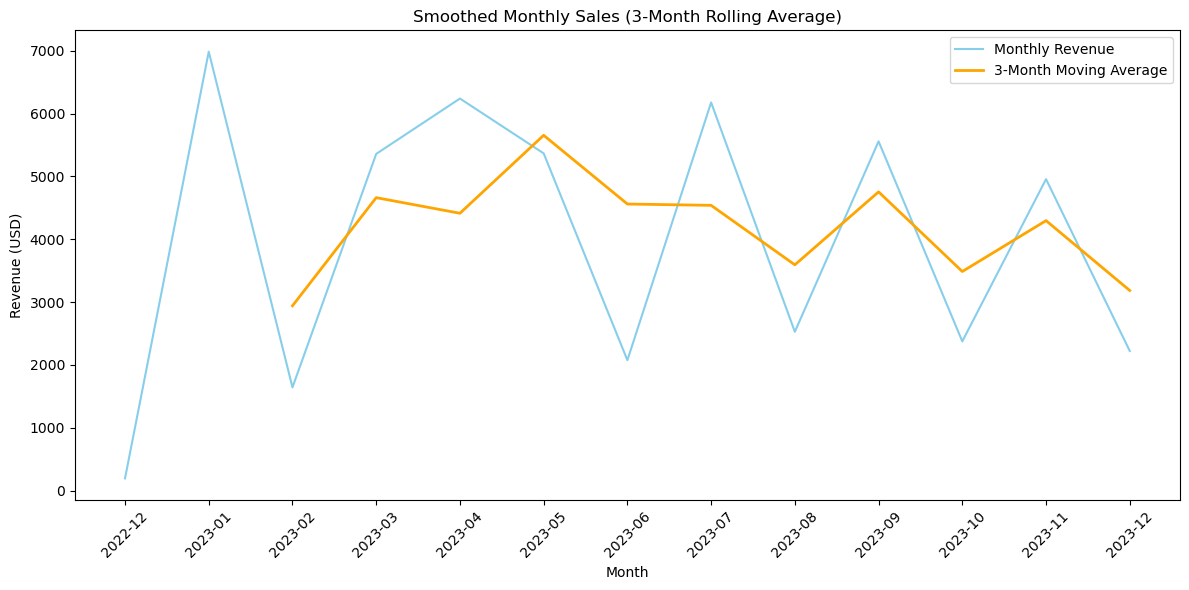

In [40]:
# 3-Month Rolling Average to Smooth Trends 
monthly_sales['Rolling_Avg'] = monthly_sales['Revenue'].rolling(3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'], monthly_sales['Revenue'], label='Monthly Revenue', color='skyblue')
plt.plot(monthly_sales['Month'], monthly_sales['Rolling_Avg'], label='3-Month Moving Average', color='orange', linewidth=2)
plt.title('Smoothed Monthly Sales (3-Month Rolling Average)')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

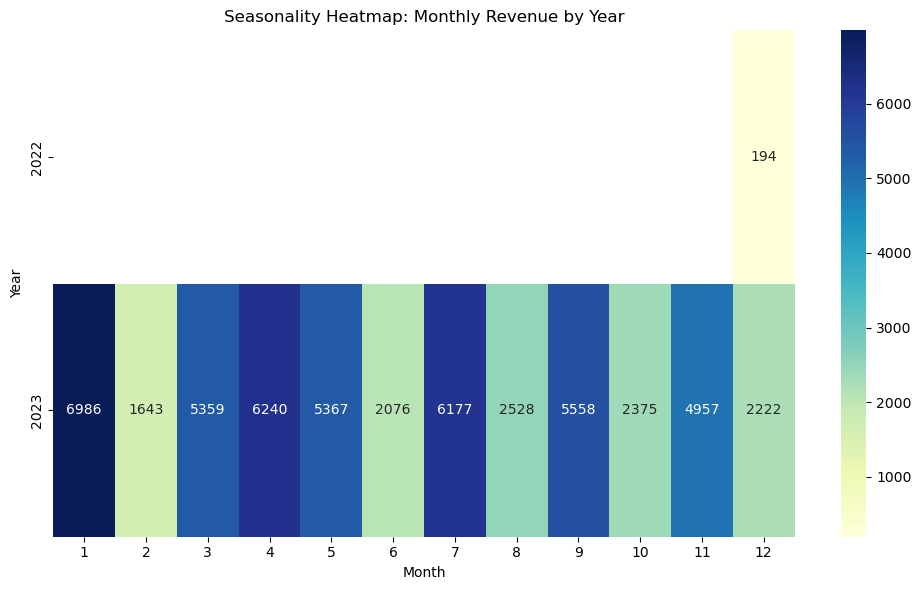

In [42]:
# Seasonality Heatmap (Month vs Year) 
monthly_sales['Year'] = monthly_sales['Order Date'].dt.year
monthly_sales['Month_Num'] = monthly_sales['Order Date'].dt.month

pivot = monthly_sales.pivot_table(values='Revenue', index='Year', columns='Month_Num', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Seasonality Heatmap: Monthly Revenue by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

In [45]:
# Which categories show the most consistent growth or volatility over time?
quantity_col = None
for col in df.columns:
    if 'quantity' in col.lower() or 'unit' in col.lower() or 'sold' in col.lower():
        quantity_col = col
        break

# Compute Revenue
if quantity_col:
    df['Revenue'] = df['Price Each'] * df[quantity_col]
else:
    df['Revenue'] = df['Price Each']

# --- 4. Monthly Revenue per Category ---
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

category_monthly = (
    df.groupby(['Product', 'Month'])['Revenue']
      .sum()
      .reset_index()
)


In [46]:
# Compute Growth & Volatility 
# Convert Month to datetime
category_monthly['Month'] = pd.to_datetime(category_monthly['Month'])

# Compute month-to-month % change (growth rate)
category_monthly['Growth_Rate'] = category_monthly.groupby('Product')['Revenue'].pct_change() * 100

# Aggregate by Category
category_stats = category_monthly.groupby('Product').agg(
    Avg_Monthly_Revenue=('Revenue', 'mean'),
    Avg_Growth_Rate=('Growth_Rate', 'mean'),
    Volatility=('Growth_Rate', 'std')
).reset_index()

In [47]:
# Rank by Stability (low volatility) and Growth 
category_stats['Growth_to_Volatility'] = category_stats['Avg_Growth_Rate'] / category_stats['Volatility']

category_stats = category_stats.sort_values(by='Avg_Growth_Rate', ascending=False)
print("=== Category Growth and Volatility ===")
print(category_stats.round(2))

=== Category Growth and Volatility ===
               Product  Avg_Monthly_Revenue  Avg_Growth_Rate  Volatility  \
3           Headphones               487.57           518.68     1197.14   
2  External Hard Drive               833.84           333.41      589.36   
1                 Desk              1423.38           243.04      565.80   
9               Tablet               732.75           235.16      662.43   
6              Monitor               783.47           197.28      395.50   
0                Chair               616.57           106.16      218.64   
5               Laptop               409.63            53.20      162.33   
7                Mouse               646.57            13.49       47.26   
8              Printer               855.70             2.30      108.15   
4             Keyboard              1103.06           -11.36       58.84   

   Growth_to_Volatility  
3                  0.43  
2                  0.57  
1                  0.43  
9                  0

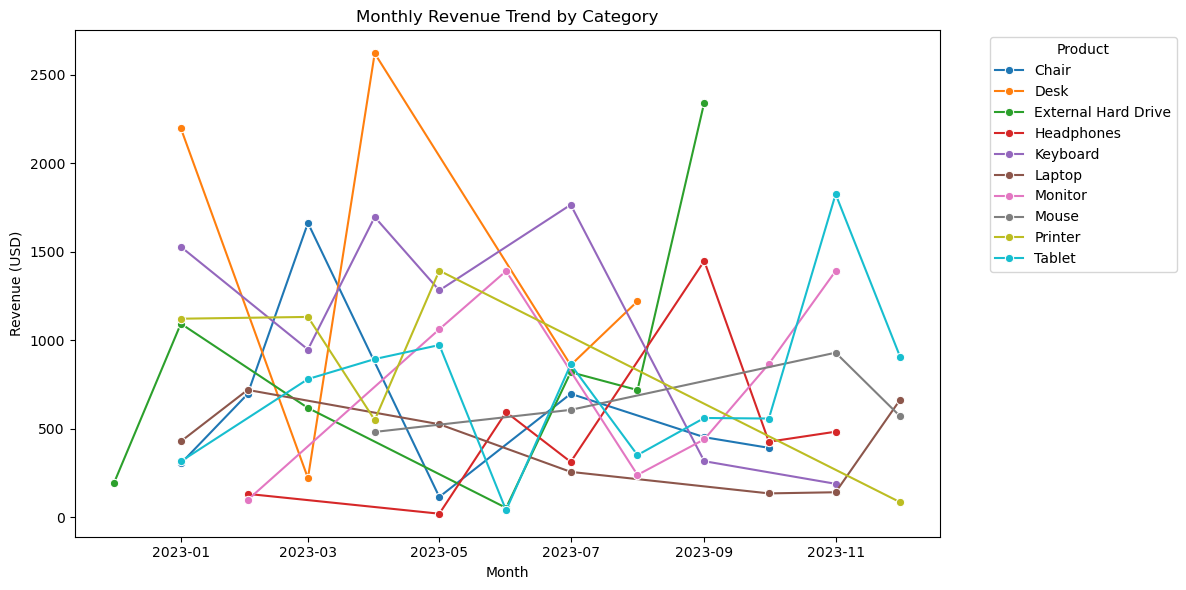

In [49]:
# Visualization: Trend Lines per Category ---
plt.figure(figsize=(12,6))
sns.lineplot(data=category_monthly, x='Month', y='Revenue', hue='Product', marker='o')
plt.title('Monthly Revenue Trend by Category')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

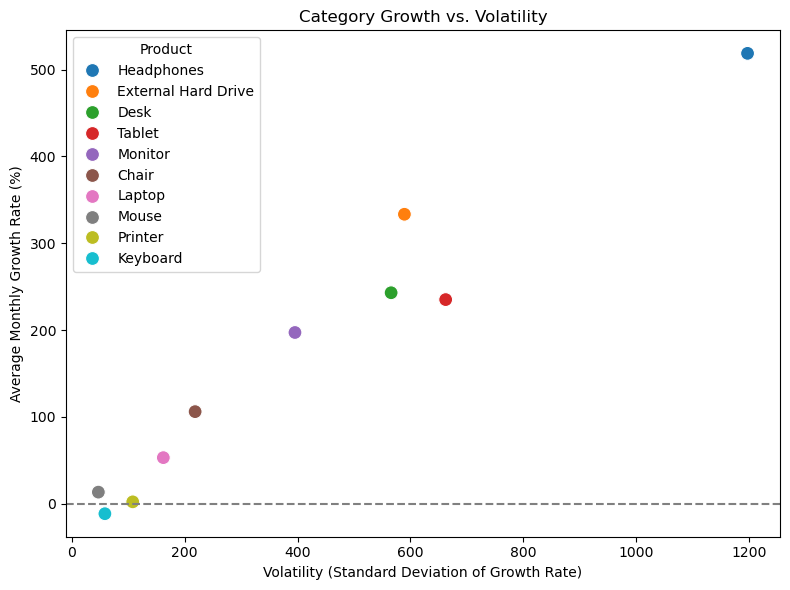

In [50]:
# Visualization: Growth vs. Volatility Scatterplot ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=category_stats, x='Volatility', y='Avg_Growth_Rate', hue='Product', s=100)
plt.title('Category Growth vs. Volatility')
plt.xlabel('Volatility (Standard Deviation of Growth Rate)')
plt.ylabel('Average Monthly Growth Rate (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# Predictive and Advanced Modeling
* Regression: Predict product price

In [51]:
# Predictive and Advanced Modeling
# Regression: Predict product price
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [52]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Revenue,Year,Month,Quarter
0,1,Monitor,1,150.89,2023-10-07,150.89,2023,2023-10,2023Q4
1,2,Keyboard,4,36.51,2023-01-03,146.04,2023,2023-01,2023Q1


In [60]:
# Select Feature
# Use available relevant predictors (adjust these to your actual column names)
features = ['Quantity Ordered', 'Revenue', 'Year']
target = 'Price Each'

In [61]:
#  Split Data ---
X = df[features]
y = df[target]


In [62]:
# Preprocess Data 
# Identify categorical and numeric columns
categorical_cols = [c for c in X.columns if X[c].dtype == 'object']
numeric_cols = [c for c in X.columns if c not in categorical_cols]

# Define preprocessing: one-hot encode categoricals, scale numerics
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# --- 7. Define Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

In [63]:
# Train and Evaluate 
results = []
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R² Score': round(r2, 3)
    })

In [64]:
# --- 9. Display Performance ---
results_df = pd.DataFrame(results)
print("=== Regression Model Performance ===")
print(results_df)

# --- 10. Optional: Feature Importance (for Linear Regression) ---
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])
final_model.fit(X_train, y_train)

# Extract coefficients
coefs = final_model.named_steps['model'].coef_
feature_names = final_model.named_steps['preprocessor'].get_feature_names_out()
importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
importance = importance.sort_values(by='Coefficient', ascending=False)
print("\nTop Predictive Features:")
print(importance.head(10))

=== Regression Model Performance ===
               Model    MAE   RMSE  R² Score
0  Linear Regression  25.62  33.64     0.651
1   Ridge Regression  25.75  33.87     0.646
2   Lasso Regression  25.62  33.65     0.651

Top Predictive Features:
                 Feature  Coefficient
1           num__Revenue    65.535370
2              num__Year    -2.284785
0  num__Quantity Ordered   -39.705207


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


=== Non-linear Model Performance ===
               Model    MAE   RMSE  R² Score
0      Random Forest  11.77  18.03     0.900
1  Gradient Boosting   8.62  11.06     0.962


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10192\3127977239.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


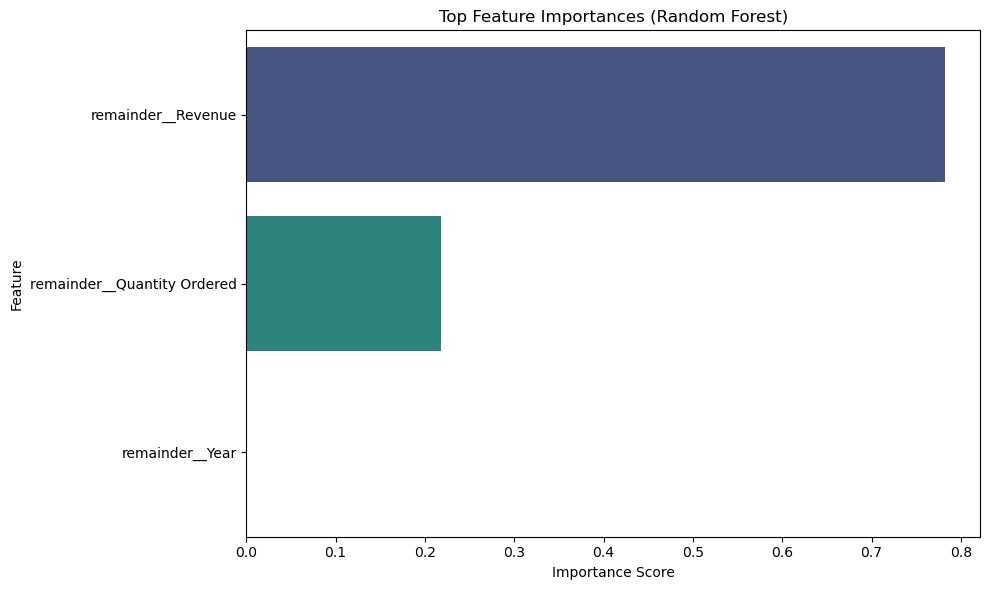

In [67]:
# --- 4. Preprocessing ---
categorical_cols = [c for c in X.columns if X[c].dtype == 'object']
numeric_cols = [c for c in X.columns if c not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns as-is
)

# --- 5. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 6. Define Models ---
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
}

results = []

# --- 7. Train and Evaluate ---
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R² Score': round(r2, 3)
    })

# --- 8. Results Summary ---
results_df = pd.DataFrame(results)
print("\n=== Non-linear Model Performance ===")
print(results_df)

# --- 9. Feature Importance (Random Forest) ---
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=300, random_state=42))])
rf_model.fit(X_train, y_train)

# Get feature importances
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.named_steps['model'].feature_importances_

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(15)

# --- 10. Plot Feature Importances ---
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title('Top Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()